In [ ]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import tensorflow as tf

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
from google.colab import drive
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


 Mounting the drive

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
currentDirectory = "/content/drive/My Drive/VQA_Project/"
dataDirectory = currentDirectory + "Data/"
train_imageDirectory = dataDirectory + "Train/train2014/"
train_question_file_path = dataDirectory + 'Train/v2_OpenEnded_mscoco_train2014_questions.json'
train_annotation_file_path = dataDirectory + 'Train/v2_mscoco_train2014_annotations.json'
validation_imageDirectory = dataDirectory + "Validation/val2014/"
validation_question_file_path = dataDirectory + 'Validation/v2_OpenEnded_mscoco_val2014_questions.json'
validation_annotation_file_path = dataDirectory + 'Validation/v2_mscoco_val2014_annotations.json'
test_imageDirectory = dataDirectory + "Test/test2015/"
test_question_file_path = dataDirectory + 'Test/v2_OpenEnded_mscoco_test2015_questions.json'

**Data Transformation**

In [ ]:
os.chdir(dataDirectory + "Train/")

In [ ]:
with open(train_question_file_path, 'r') as f:
    train_questions = json.load(f)
    train_questions = train_questions["questions"]

with open(train_annotation_file_path, 'r') as f:
    train_annotations = json.load(f)
    train_annotations = train_annotations["annotations"]

In [ ]:
os.chdir(dataDirectory + "Validation/")

In [ ]:
with open(validation_question_file_path, 'r') as f:
    validation_questions = json.load(f)
    validation_questions = validation_questions["questions"]

with open(validation_annotation_file_path, 'r') as f:
    validation_annotations = json.load(f)
    validation_annotations = validation_annotations["annotations"]

In [ ]:
print("Total Number Questions in Train Dataset are : ",len(train_questions))

Total Number Questions in Train Dataset are :  443757


In [ ]:
train_questions_df = pd.DataFrame(train_questions)
train_questions_df.head(5)

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001
2,458752,What color is the players shirt?,458752002
3,458752,Is this man a professional baseball player?,458752003
4,262146,What color is the snow?,262146000


In [ ]:
train_annotations_df = pd.DataFrame(train_annotations)
train_annotations_df.head(5)

,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",458752,other,458752000
1,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",458752,other,458752001
2,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",458752,other,458752002
3,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",458752,yes/no,458752003
4,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",262146,other,262146000


In [ ]:
print("Total Number Questions in Validation Dataset are : ",len(validation_questions))

Total Number Questions in Validation Dataset are :  214354


In [ ]:
validation_annotations_df = pd.DataFrame(validation_annotations)
validation_annotations_df.head(5)

,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,none of the above,down,"[{'answer': 'down', 'answer_confidence': 'yes'...",262148,other,262148000
1,what are the,watching,"[{'answer': 'spectating', 'answer_confidence':...",262148,other,262148001
2,what is,picnic table,"[{'answer': 'table', 'answer_confidence': 'yes...",262148,other,262148002
3,what,foodiebakercom,"[{'answer': 'foodiebakercom', 'answer_confiden...",393225,other,393225000
4,is this a,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",393225,yes/no,393225001


In [ ]:
validation_questions_df = pd.DataFrame(validation_questions)
validation_questions_df.head(5)

,image_id,question,question_id
0,262148,Where is he looking?,262148000
1,262148,What are the people in the background doing?,262148001
2,262148,What is he on top of?,262148002
3,393225,What website copyrighted the picture?,393225000
4,393225,Is this a creamy soup?,393225001


In [ ]:
train_data = pd.merge(train_questions_df,train_annotations_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])

In [ ]:
train_data.head(5)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,458752,What is this photo taken looking through?,458752000,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",other
1,458752,What position is this man playing?,458752001,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",other
2,458752,What color is the players shirt?,458752002,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",other
3,458752,Is this man a professional baseball player?,458752003,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
4,262146,What color is the snow?,262146000,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",other


In [ ]:
validation_data = pd.merge(validation_questions_df,validation_annotations_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])

In [ ]:
validation_data.head(5)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,262148,Where is he looking?,262148000,none of the above,down,"[{'answer': 'down', 'answer_confidence': 'yes'...",other
1,262148,What are the people in the background doing?,262148001,what are the,watching,"[{'answer': 'spectating', 'answer_confidence':...",other
2,262148,What is he on top of?,262148002,what is,picnic table,"[{'answer': 'table', 'answer_confidence': 'yes...",other
3,393225,What website copyrighted the picture?,393225000,what,foodiebakercom,"[{'answer': 'foodiebakercom', 'answer_confiden...",other
4,393225,Is this a creamy soup?,393225001,is this a,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no


In [ ]:
os.chdir(train_imageDirectory)

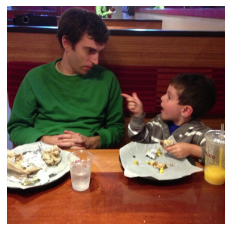

**************************************************
Question :  What is the man holding?
**************************************************
Answer :  nothing
(612, 612, 3)


In [ ]:
index = np.random.randint(0,len(train_data))#263115

img_path =  train_imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (train_data['image_id'][index])
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("*"*50)
print("Question : " ,train_data['question'][index])
print("*"*50)
print("Answer : ", train_data['multiple_choice_answer'][index])

print(img.shape)

In [ ]:
os.chdir(validation_imageDirectory)

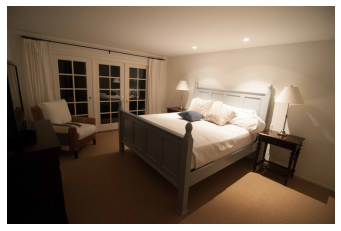

**************************************************
Question :  How many lights?
**************************************************
Answer :  2
(425, 640, 3)


In [ ]:
index = np.random.randint(0,len(validation_data))#263115

img_path =  validation_imageDirectory + 'COCO_val2014_' + '%012d.jpg' % (validation_data['image_id'][index])
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("*"*50)
print("Question : " ,validation_data['question'][index])
print("*"*50)
print("Answer : ", validation_data['multiple_choice_answer'][index])

print(img.shape)

# Saving Final Data 

In [ ]:
train_data.to_csv(dataDirectory + 'train_data.csv')

In [ ]:
validation_data.to_csv(dataDirectory + 'validation_data.csv')

**Data Visualization on train_data**


In [ ]:
os.chdir(dataDirectory)
train_data = pd.read_csv(dataDirectory + 'train_data.csv')

In [ ]:
validation_data = pd.read_csv(dataDirectory + 'validation_data.csv')

Maximum number of questions: 275
Minimum number of questions: 3
Mean: 5.3604846405663


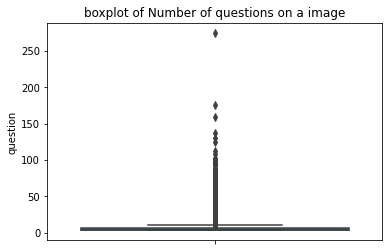

In [ ]:
#Box Plot

aggregations = {'question': 'count'}
temp = pd.DataFrame(train_data.groupby(['image_id'],as_index=False).agg(aggregations))
num_of_ques_in_image = temp['question'].values
print("Maximum number of questions:",max(num_of_ques_in_image))
print("Minimum number of questions:",min(num_of_ques_in_image))
print("Mean:",np.mean(num_of_ques_in_image))

ax = sns.boxplot(y = 'question', data = temp) 
plt.title("boxplot of Number of questions on a image")
plt.show()

In [ ]:
os.chdir(train_imageDirectory)

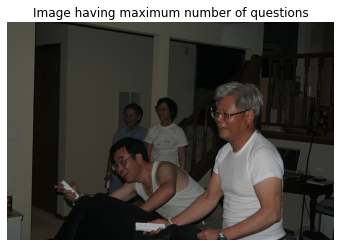

In [ ]:
#Image having most number of questions
image_path =  train_imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (temp[temp['question'] == 275]['image_id'].values[0])
image=mpimg.imread(image_path)
imgplot = plt.imshow(image)
plt.axis('off')
plt.title("Image having maximum number of questions")
plt.show()

In [ ]:
#Duplicate Questions on same Image
aggregations = {'question_id':'count', 'multiple_choice_answer': lambda x: " || ".join(x)}
temp = pd.DataFrame(train_data.groupby(['image_id','question'],as_index=False).agg(aggregations)).rename(columns={'question_id':'count'})
temp = temp[temp['count']>1]
temp

,image_id,question,count,multiple_choice_answer
161,312,How many baby elephants are there?,2,1 || 1
1801,2614,What does the man in the blue shirt have in hi...,2,frisbee || frisbee
2035,3008,What color is the woman's hair?,2,brown || brown
8122,11065,What color is the horse?,2,brown || brown
12228,16414,What color is the parking meter?,2,black and yellow || black
...,...,...,...,...
416873,547471,What color is the man's suit?,2,black || black
422225,554455,What color is the clock?,2,gold || gold
426189,559619,What does the red sign say?,2,stop || stop
429722,564264,What is the dog carrying?,2,toy || toy


**Visualizations on Questions**

In [ ]:
#Question Type
train_data.question_type.unique()

array(['what is this', 'what', 'what color is the', 'is this',
       'what is the person', 'what is in the', 'is the', 'is there',
       'what is the', 'is', 'is the man', 'none of the above', 'does the',
       'are the', 'was', 'how many', 'what color is', 'what is the man',
       'what is on the', 'what is', 'how many people are in',
       'is there a', 'is it', 'is the person', 'what does the',
       'is this a', 'how', 'are there', 'has', 'could', 'where is the',
       'are', 'are they', 'are these', 'why is the',
       'how many people are', 'what color are the', 'what type of',
       'where are the', 'what kind of', 'which', 'do', 'what is the name',
       'is this an', 'what is the color of the', 'what color',
       'what sport is', 'what are', 'what brand', 'what time',
       'what are the', 'does this', 'is the woman', 'are there any',
       'is that a', 'what animal is', 'why', 'do you',
       'what is the woman', 'is this person', 'can you', 'is he',
       'wh

In [ ]:
#Printing the Unique Questions
print("Number of unique Question type in dataset : ",len(train_data.question_type.unique()))

Number of unique Question type in dataset :  65


In [ ]:
def getFrequnctDict(train_data,column,isJoin=False):
    column_frequency = {}

    for _row in train_data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(column_frequency.get(_row,-1) > 0):
            column_frequency[_row] += 1
        else:
            column_frequency[_row] = 1

    return column_frequency

def lineChart(train_data,column,top=20,isJoin=False):
    column_frequncy = getFrequnctDict(train_data,column,isJoin)
    sort_column_frequncy = sorted(list(column_frequncy.items()),key = lambda x: x[1],reverse=True)
    total_samples =  len(train_data)

    plt.plot([x[1]for x in sort_column_frequncy[:top]])
    i=np.arange(top)
    plt.title("Frequency of top " + str(top) + " " + column )
    plt.xlabel("Tags")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in sort_column_frequncy[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return sort_column_frequncy

def plotWordCloud(train_data,column,isJoin=False):
    column_frequncy = getFrequnctDict(train_data,column,isJoin)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(column_frequncy)
    # plot the WordCloud image     
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud on "+ column)  
    plt.show()

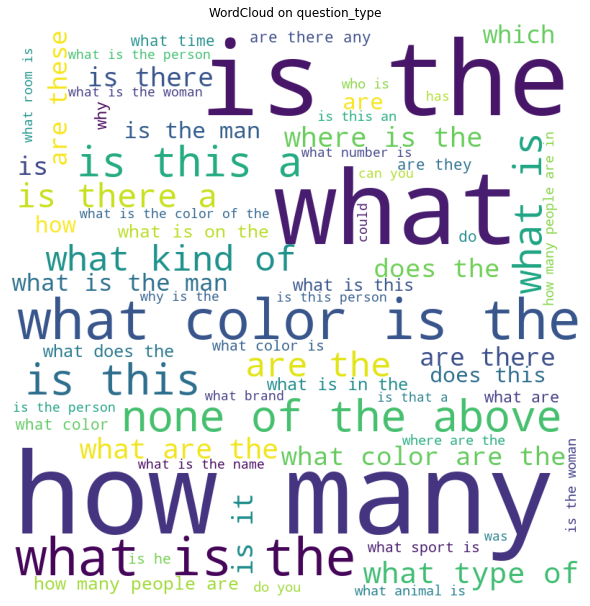

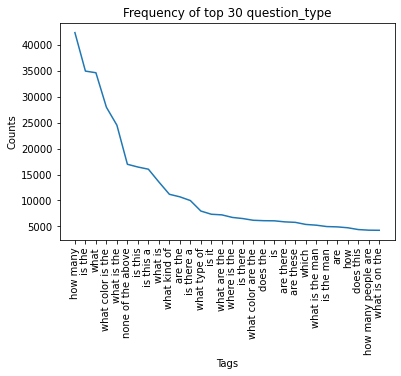

In [ ]:
#plot Between WordCloud and Linechart
plotWordCloud(train_data, 'question_type')
question_type_frequncy = lineChart(train_data, 'question_type', top = 30)

In [ ]:
for _type,_count in question_type_frequncy[:10]:
    print("Percentage of '" + _type + "' Type of Questions in Dataset is ", str(100*_count/len(train_data)) )

Percentage of 'how many' Type of Questions in Dataset is  9.541032592161926
Percentage of 'is the' Type of Questions in Dataset is  7.8707490811412555
Percentage of 'what' Type of Questions in Dataset is  7.7988628911769275
Percentage of 'what color is the' Type of Questions in Dataset is  6.301196375493795
Percentage of 'what is the' Type of Questions in Dataset is  5.521490365222408
Percentage of 'none of the above' Type of Questions in Dataset is  3.8248410729295537
Percentage of 'is this' Type of Questions in Dataset is  3.7056316858100264
Percentage of 'is this a' Type of Questions in Dataset is  3.610985291499627
Percentage of 'what is' Type of Questions in Dataset is  3.0559517934364977
Percentage of 'what kind of' Type of Questions in Dataset is  2.522101059814268


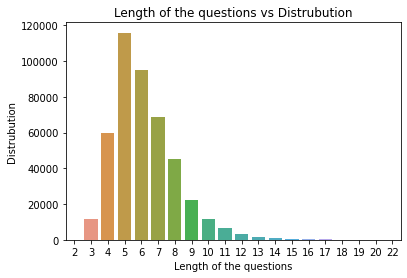

In [ ]:
#Using Box Plot 
sns.countplot(train_data["question"].apply(lambda x: len(x.split())).values)
plt.title("Length of the questions vs Distrubution")
plt.xlabel("Length of the questions")
plt.ylabel("Distrubution")
plt.show()

**Visualization On Answers**

In [ ]:
#Unique Answers
train_data['answer_type'].unique()

array(['other', 'yes/no', 'number'], dtype=object)

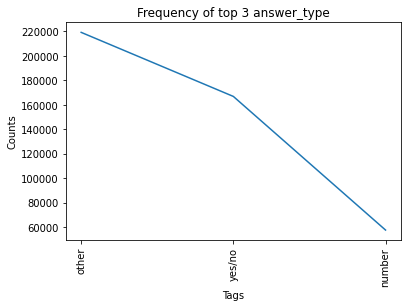

In [ ]:
#Line Chart for Answer_type
answer_type_frequncy = lineChart(train_data, 'answer_type', top = 3)

In [ ]:
#Types of Answers in Dataset like 'Other', 'Yes/No', 'Number'
for _type,_count in answer_type_frequncy:
    print("Percentage of '" + _type + "' Type of Answers in Dataset is ", str(100*_count/len(train_data)) )

Percentage of 'other' Type of Answers in Dataset is  49.41195293820717
Percentage of 'yes/no' Type of Answers in Dataset is  37.60661803644788
Percentage of 'number' Type of Answers in Dataset is  12.981429025344953


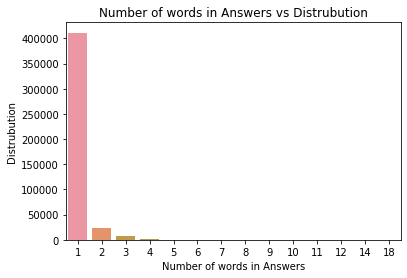

In [ ]:
#Box Plot 
sns.countplot(train_data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
plt.title("Number of words in Answers vs Distrubution")
plt.xlabel("Number of words in Answers")
plt.ylabel("Distrubution")
plt.show()

**Visualization on Question Type vs Answer**

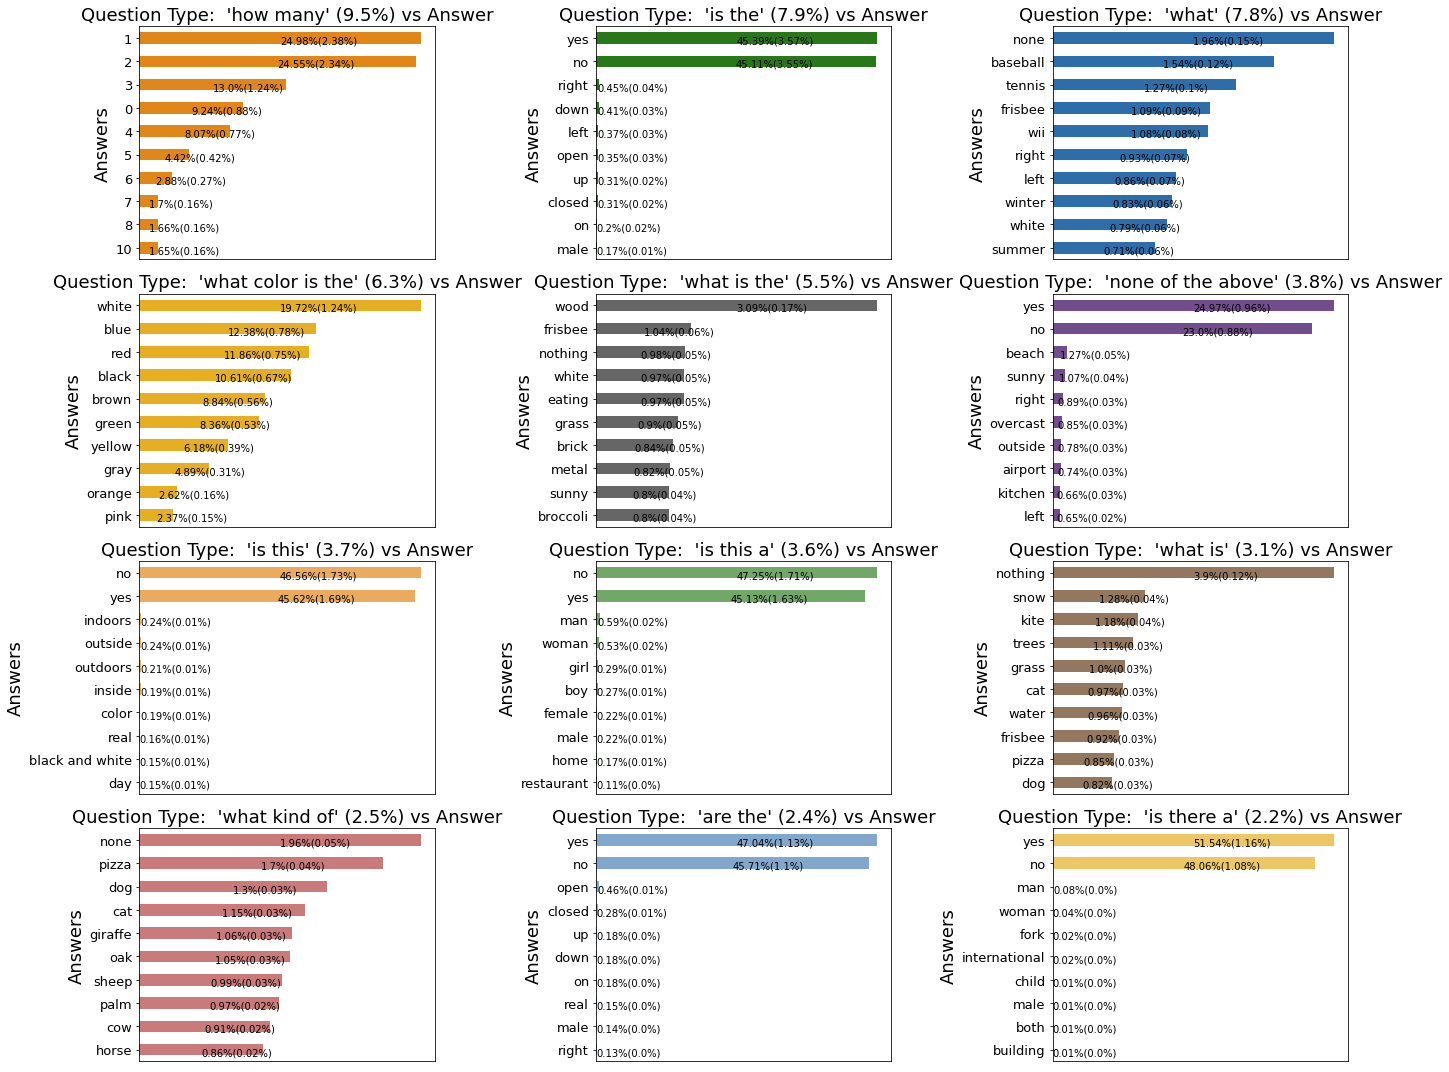

In [ ]:
# Visualization on Questions Type vs Answer
fig = plt.figure(figsize=(80,30))
fig.tight_layout() 
count = 1
colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

for _type,_ in question_type_frequncy[:12]:

    percentage = str(round((len(train_data[train_data['question_type']==_type])/len(train_data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = train_data[train_data['question_type']==_type]
    ax = temp['multiple_choice_answer'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Question Type:  '" + _type + "' (" + percentage + ") vs Answer" , fontsize=18)
    ax.set_ylabel("Answers", fontsize=18)
    ax.get_xaxis().set_visible(False)


    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(train_data))*100, 2))+'%' +")", fontsize=10,color='black')
        
    count += 1

fig.tight_layout()
plt.show()


**Visualization on Answer vs Question type**

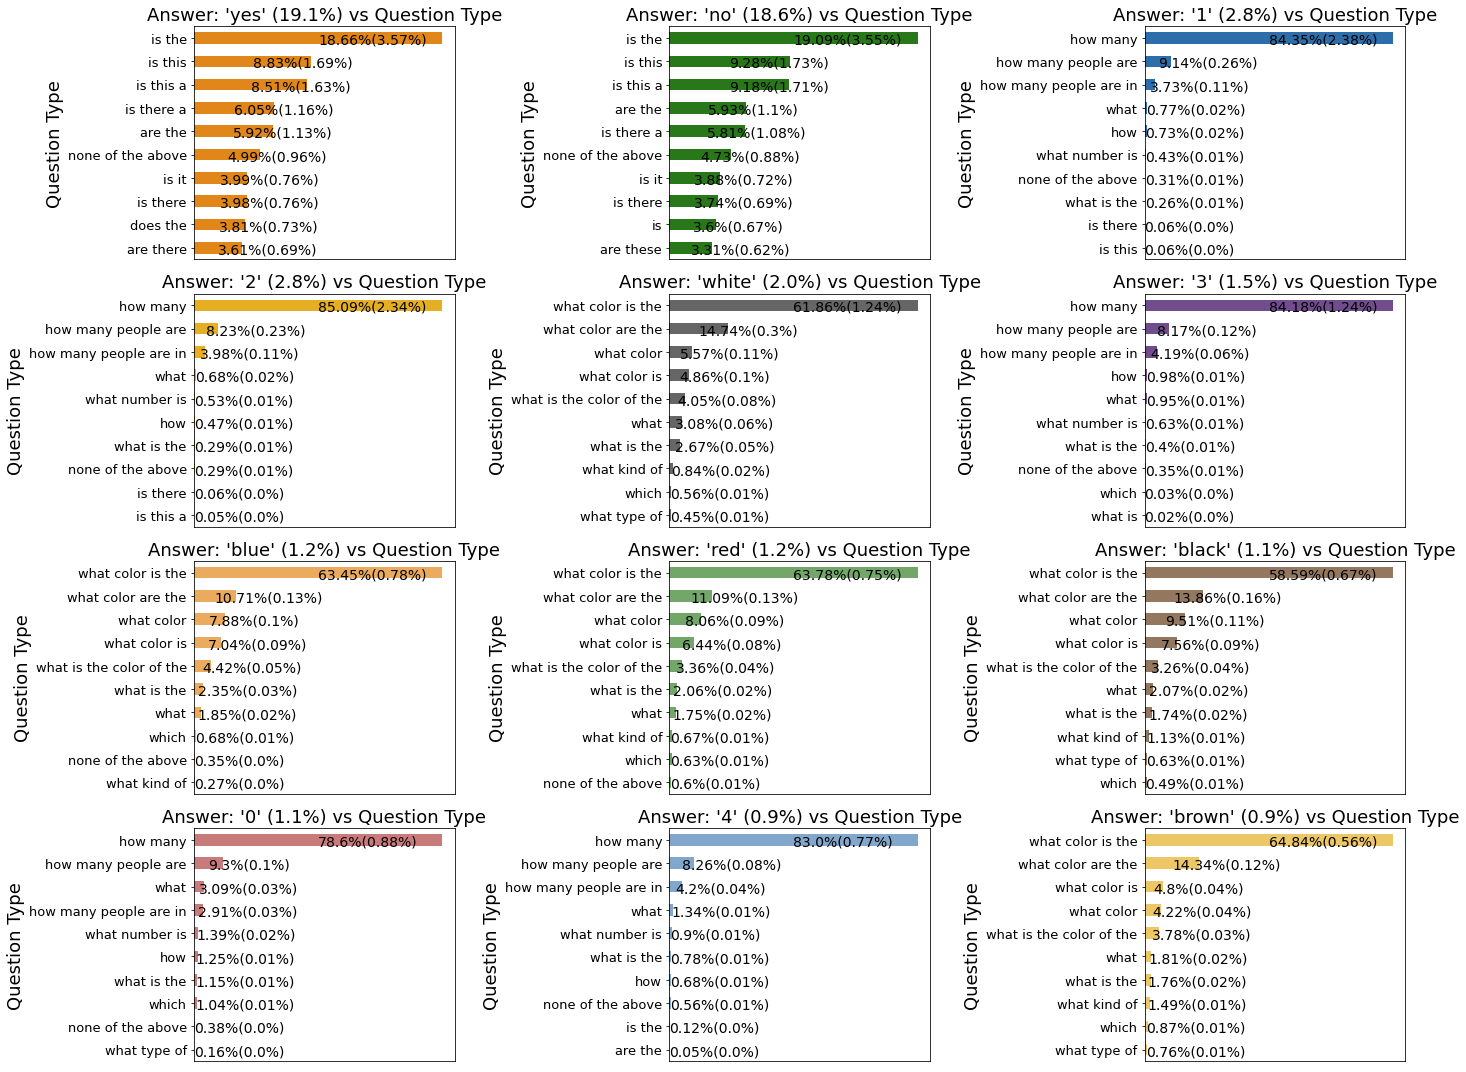

In [ ]:
#Visulaizations on Answer vs Question Type
fig = plt.figure()
fig.tight_layout() 
count = 1

colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

answer_frequncy = sorted(list(getFrequnctDict(train_data,'multiple_choice_answer').items()),key = lambda x: x[1],reverse=True)

for _type,_ in answer_frequncy[:12]:

    percentage = str(round((len(train_data[train_data['multiple_choice_answer']==_type])/len(train_data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = train_data[train_data['multiple_choice_answer']==_type]
    ax = temp['question_type'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Answer: '" + _type + "' (" + percentage + ") vs Question Type" , fontsize=18)
    ax.set_ylabel("Question Type", fontsize=18)
    ax.get_xaxis().set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(train_data))*100, 2))+'%' +")", fontsize=14,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

In [ ]:
#checking if acutal answer is same as persons answers

def getPeopleAnswer(answers):
    answers_dict = {}
    score_dict = { 'yes' : 3, 'maybe' : 2, 'no' : 1 }
    for _answer in answers:
        score = score_dict[_answer['answer_confidence']]
        if answers_dict.get(_answer['answer'],-1) != -1 :
            answers_dict[_answer['answer']] += score
        else:
            answers_dict[_answer['answer']] = score

    return sorted(list(answers_dict.items()),key = lambda x: x[1],reverse=True)[0][0]

In [ ]:
train_data['derived_answer'] =  train_data["answers"].apply(lambda x: getPeopleAnswer(x))

In [ ]:
#checking if Questions has any multiple answers
train_data[ train_data['derived_answer'] != train_data['multiple_choice_answer']]

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type,derived_answer
35,131074,What is on the pillow?,131074000,what is on the,gray,"[{'answer': 'pillow sham', 'answer_confidence'...",other,pillow sham
46,393230,What is the person wearing?,393230005,what is the person,skis,"[{'answer': 'ski clothes', 'answer_confidence'...",other,ski clothes
56,131087,What is in the water?,131087004,what is in the,dog,"[{'answer': 'dog on surfboard', 'answer_confid...",other,dog on surfboard
57,131075,"What does the green light, on the TV, indicate?",131075000,what does the,on,"[{'answer': 'it's turned on', 'answer_confiden...",other,background
66,131075,What is above the TV?,131075009,what is,vent,"[{'answer': 'vent', 'answer_confidence': 'yes'...",other,ceiling
...,...,...,...,...,...,...,...,...
443689,477475,What is this man selling?,477475021,what is this,nothing,"[{'answer': 'food', 'answer_confidence': 'mayb...",other,clothes
443716,469619,What kind of food is on the left?,469619002,what kind of,rice,"[{'answer': 'potatoes', 'answer_confidence': '...",other,potatoes
443726,87378,What kind of pattern is decorating the boat?,87378003,what kind of,scale,"[{'answer': 'honeycomb', 'answer_confidence': ...",other,scales
443745,262136,How heavy is this man?,262136001,how,150 pounds,"[{'answer': 'medium heaviness', 'answer_confid...",number,not heavy


**Data Visualization on Validation set**

In [ ]:
#Question Type
validation_data.question_type.unique()

array(['none of the above', 'what are the', 'what is', 'what',
       'is this a', 'is this', 'what is the man', 'how many',
       'what does the', 'why', 'is it', 'why is the', 'what color is the',
       'is there a', 'is the', 'is that a', 'are these', 'are the',
       'what is the', 'which', 'could', 'are there', 'what kind of',
       'has', 'what color are the', 'are there any', 'is this person',
       'does the', 'where is the', 'how many people are', 'can you',
       'what type of', 'what is the color of the', 'what is on the',
       'does this', 'is this an', 'who is', 'what is this', 'is there',
       'are', 'what time', 'how', 'what is in the', 'do you', 'what are',
       'what sport is', 'what is the person', 'is he', 'where are the',
       'what brand', 'what number is', 'what color is',
       'what is the woman', 'what room is', 'is', 'what color',
       'is the woman', 'are they', 'is the person', 'is the man',
       'what animal is', 'what is the name', 'was'

Maximum number of questions: 132
Minimum number of questions: 3
Mean: 5.292168674698795


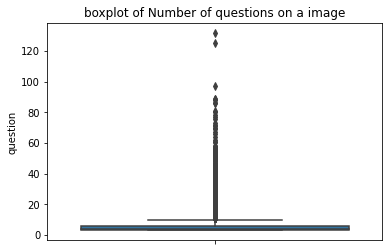

In [ ]:
#Box Plot

aggregations = {'question': 'count'}
temp = pd.DataFrame(validation_data.groupby(['image_id'],as_index=False).agg(aggregations))
num_of_ques_in_image = temp['question'].values
print("Maximum number of questions:",max(num_of_ques_in_image))
print("Minimum number of questions:",min(num_of_ques_in_image))
print("Mean:",np.mean(num_of_ques_in_image))

ax = sns.boxplot(y = 'question', data = temp) 
plt.title("boxplot of Number of questions on a image")
plt.show()

In [ ]:
#Duplicate Questions on same Image
aggregations = {'question_id':'count', 'multiple_choice_answer': lambda x: " || ".join(x)}
temp = pd.DataFrame(train_data.groupby(['image_id','question'],as_index=False).agg(aggregations)).rename(columns={'question_id':'count'})
temp = temp[temp['count']>1]
temp

,image_id,question,count,multiple_choice_answer
161,312,How many baby elephants are there?,2,1 || 1
1801,2614,What does the man in the blue shirt have in hi...,2,frisbee || frisbee
2035,3008,What color is the woman's hair?,2,brown || brown
8122,11065,What color is the horse?,2,brown || brown
12228,16414,What color is the parking meter?,2,black and yellow || black
...,...,...,...,...
416873,547471,What color is the man's suit?,2,black || black
422225,554455,What color is the clock?,2,gold || gold
426189,559619,What does the red sign say?,2,stop || stop
429722,564264,What is the dog carrying?,2,toy || toy


**Visualization on Question**

In [ ]:
    #Question Type
    validation_data.question_type.unique()

array(['none of the above', 'what are the', 'what is', 'what',
       'is this a', 'is this', 'what is the man', 'how many',
       'what does the', 'why', 'is it', 'why is the', 'what color is the',
       'is there a', 'is the', 'is that a', 'are these', 'are the',
       'what is the', 'which', 'could', 'are there', 'what kind of',
       'has', 'what color are the', 'are there any', 'is this person',
       'does the', 'where is the', 'how many people are', 'can you',
       'what type of', 'what is the color of the', 'what is on the',
       'does this', 'is this an', 'who is', 'what is this', 'is there',
       'are', 'what time', 'how', 'what is in the', 'do you', 'what are',
       'what sport is', 'what is the person', 'is he', 'where are the',
       'what brand', 'what number is', 'what color is',
       'what is the woman', 'what room is', 'is', 'what color',
       'is the woman', 'are they', 'is the person', 'is the man',
       'what animal is', 'what is the name', 'was'

In [ ]:
#Printing the Unique Questions
print("Number of unique Question type in dataset : ",len(validation_data.question_type.unique()))

Number of unique Question type in dataset :  65


In [ ]:
def getFrequnctDict(validation_data,column,isJoin=False):
    column_frequency = {}

    for _row in validation_data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(column_frequency.get(_row,-1) > 0):
            column_frequency[_row] += 1
        else:
            column_frequency[_row] = 1

    return column_frequency

def lineChart(validation_data,column,top=20,isJoin=False):
    column_frequncy = getFrequnctDict(validation_data,column,isJoin)
    sort_column_frequncy = sorted(list(column_frequncy.items()),key = lambda x: x[1],reverse=True)
    total_samples =  len(validation_data)

    plt.plot([x[1]for x in sort_column_frequncy[:top]])
    i=np.arange(top)
    plt.title("Frequency of top " + str(top) + " " + column )
    plt.xlabel("Tags")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in sort_column_frequncy[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return sort_column_frequncy

def plotWordCloud(validation_data,column,isJoin=False):
    column_frequncy = getFrequnctDict(validation_data,column,isJoin)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(column_frequncy)
    # plot the WordCloud image     
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud on "+ column)  
    plt.show()

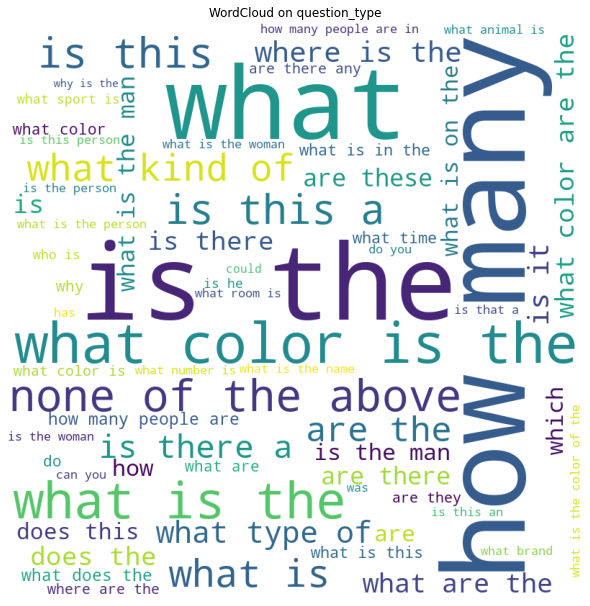

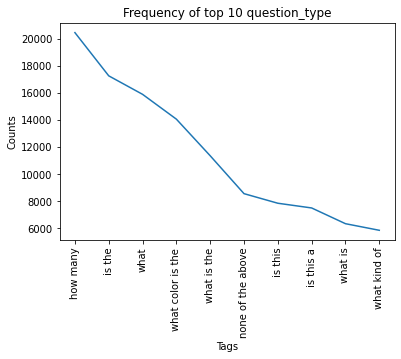

In [ ]:
#plot Between WordCloud and Linechart
plotWordCloud(validation_data, 'question_type')
question_type_frequncy = lineChart(validation_data, 'question_type', top = 10)

In [ ]:
for _type,_count in question_type_frequncy[:10]:
    print("Percentage of '" + _type + "' Type of Questions in Dataset is ", str(100*_count/len(validation_data)) )

Percentage of 'how many' Type of Questions in Dataset is  9.545891375948198
Percentage of 'is the' Type of Questions in Dataset is  8.054433320581841
Percentage of 'what' Type of Questions in Dataset is  7.416236692573967
Percentage of 'what color is the' Type of Questions in Dataset is  6.559709639194977
Percentage of 'what is the' Type of Questions in Dataset is  5.29637888726126
Percentage of 'none of the above' Type of Questions in Dataset is  3.9887289250492177
Percentage of 'is this' Type of Questions in Dataset is  3.657967660972037
Percentage of 'is this a' Type of Questions in Dataset is  3.49515287794956
Percentage of 'what is' Type of Questions in Dataset is  2.952125922539351
Percentage of 'what kind of' Type of Questions in Dataset is  2.724465137109641


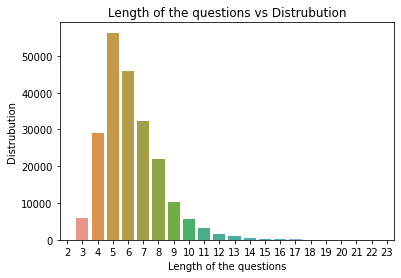

In [ ]:
#Using Box Plot 
sns.countplot(validation_data["question"].apply(lambda x: len(x.split())).values)
plt.title("Length of the questions vs Distrubution")
plt.xlabel("Length of the questions")
plt.ylabel("Distrubution")
plt.show()

**Visualization on Answers**

In [ ]:
#Unique Answers
validation_data['answer_type'].unique()

array(['other', 'yes/no', 'number'], dtype=object)

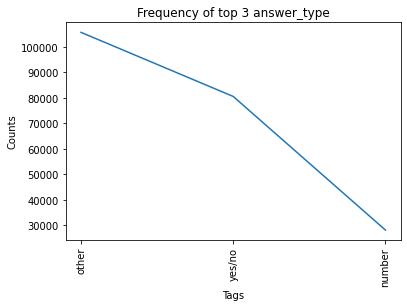

In [ ]:
#Line Chart for Answer_type
answer_type_frequncy = lineChart(validation_data, 'answer_type', top = 3)

In [ ]:
#Types of Answers in Dataset like 'Other', 'Yes/No', 'Number'
for _type,_count in answer_type_frequncy:
    print("Percentage of '" + _type + "' Type of Answers in Dataset is ", str(100*_count/len(validation_data)) )

Percentage of 'other' Type of Answers in Dataset is  49.30115603161126
Percentage of 'yes/no' Type of Answers in Dataset is  37.57382647396363
Percentage of 'number' Type of Answers in Dataset is  13.12501749442511


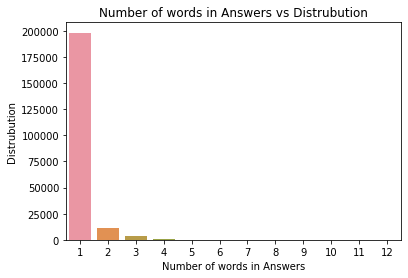

In [ ]:
#Box Plot 
sns.countplot(validation_data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
plt.title("Number of words in Answers vs Distrubution")
plt.xlabel("Number of words in Answers")
plt.ylabel("Distrubution")
plt.show()

**Visualization on Question Type and Answer**

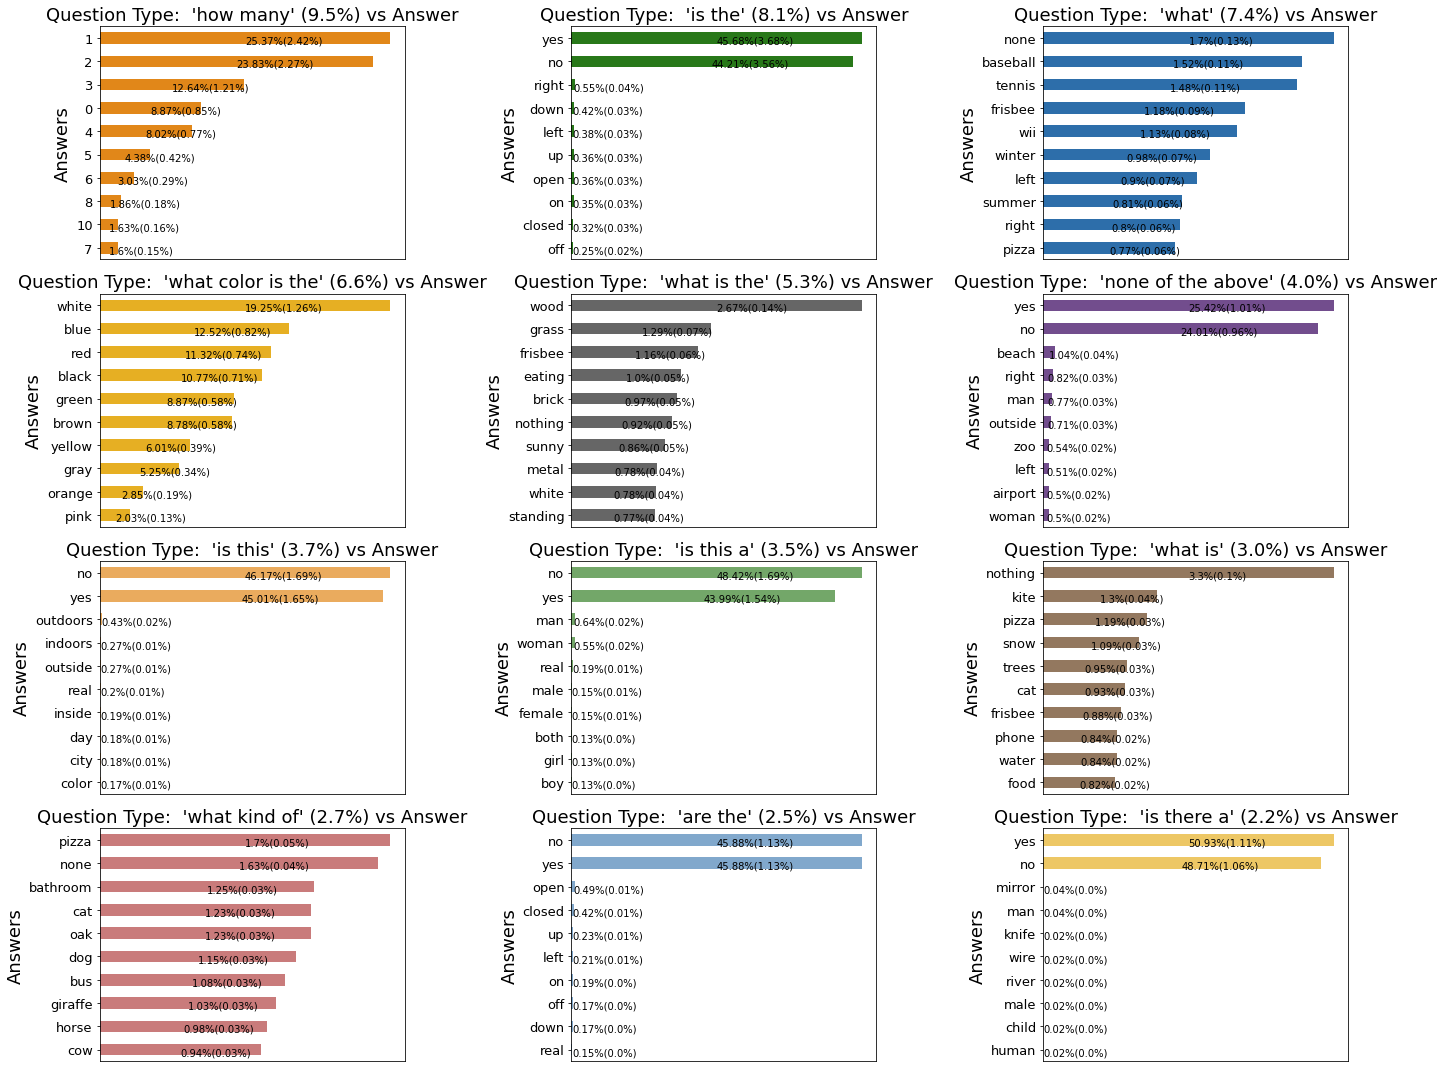

In [ ]:
# Visualization on Questions Type vs Answer
fig = plt.figure(figsize=(80,30))
fig.tight_layout() 
count = 1
colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

for _type,_ in question_type_frequncy[:12]:

    percentage = str(round((len(validation_data[validation_data['question_type']==_type])/len(validation_data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = validation_data[validation_data['question_type']==_type]
    ax = temp['multiple_choice_answer'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Question Type:  '" + _type + "' (" + percentage + ") vs Answer" , fontsize=18)
    ax.set_ylabel("Answers", fontsize=18)
    ax.get_xaxis().set_visible(False)


    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(validation_data))*100, 2))+'%' +")", fontsize=10,color='black')
        
    count += 1

fig.tight_layout()
plt.show()


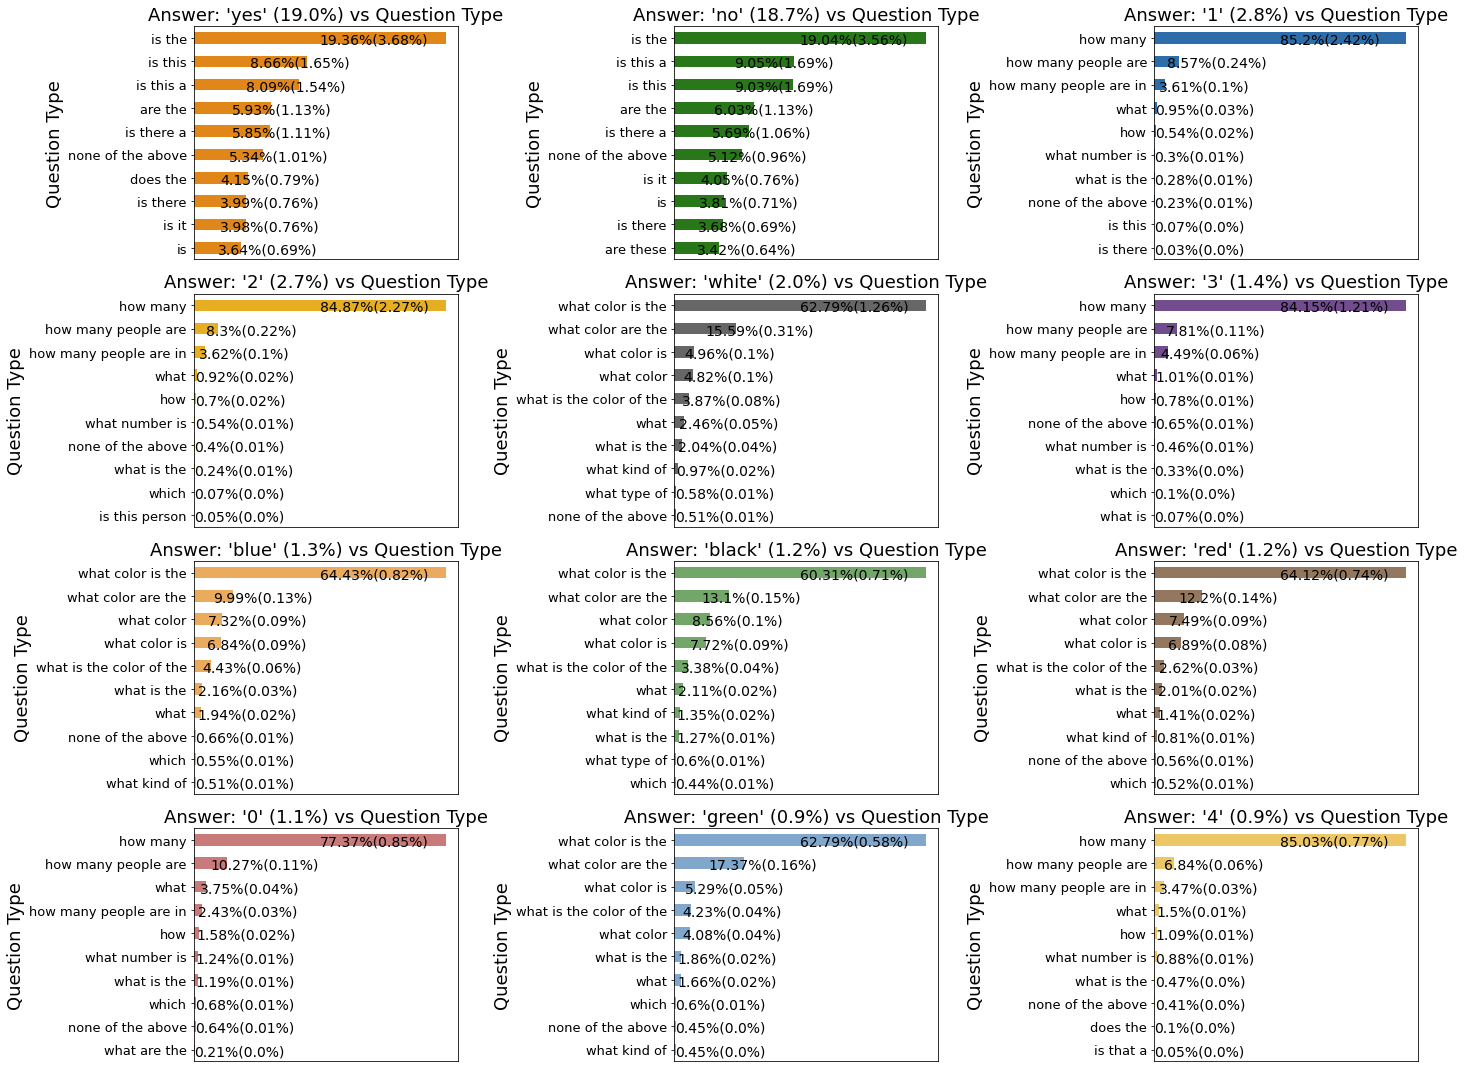

In [ ]:
#Visulaizations on Answer vs Question Type
fig = plt.figure()
fig.tight_layout() 
count = 1

colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

answer_frequncy = sorted(list(getFrequnctDict(validation_data,'multiple_choice_answer').items()),key = lambda x: x[1],reverse=True)

for _type,_ in answer_frequncy[:12]:

    percentage = str(round((len(validation_data[validation_data['multiple_choice_answer']==_type])/len(validation_data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = validation_data[validation_data['multiple_choice_answer']==_type]
    ax = temp['question_type'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Answer: '" + _type + "' (" + percentage + ") vs Question Type" , fontsize=18)
    ax.set_ylabel("Question Type", fontsize=18)
    ax.get_xaxis().set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(validation_data))*100, 2))+'%' +")", fontsize=14,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

In [ ]:
#checking if acutal answer is same as persons answers

def getPeopleAnswer(answers):
    answers_dict = {}
    score_dict = { 'yes' : 3, 'maybe' : 2, 'no' : 1 }
    for _answer in answers:
        score = score_dict[_answer['answer_confidence']]
        if answers_dict.get(_answer['answer'],-1) != -1 :
            answers_dict[_answer['answer']] += score
        else:
            answers_dict[_answer['answer']] = score

    return sorted(list(answers_dict.items()),key = lambda x: x[1],reverse=True)[0][0]

In [ ]:
validation_data['derived_answer'] =  validation_data["answers"].apply(lambda x: getPeopleAnswer(x))

In [ ]:
#checking if Questions has any multiple answers
validation_data[ validation_data['derived_answer'] != validation_data['multiple_choice_answer']]


,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type,derived_answer
57,131108,Does the door open inward or outward?,131108001,does the,inward,"[{'answer': 'inward', 'answer_confidence': 'ma...",other,outward
76,393267,Why are some people wearing hats?,393267002,why,nobody is wearing hats,"[{'answer': 'they aren't', 'answer_confidence'...",other,they aren't
105,131131,What is written lg in the pic?,131131001,what is,monitor,"[{'answer': 'tv', 'answer_confidence': 'yes', ...",other,tv
110,393277,What year is the car?,393277003,what,2010,"[{'answer': '2014', 'answer_confidence': 'mayb...",number,2014
129,393282,Why is there a white roofed open pavilion?,393282005,why,for shade,"[{'answer': 'shade', 'answer_confidence': 'yes...",other,shade
...,...,...,...,...,...,...,...,...
214271,130984,What is the train stopped next to?,130984002,what is the,building,"[{'answer': 'depot', 'answer_confidence': 'may...",other,station
214275,524202,Why the piggy back?,524202002,why,to get smaller one to launch height,"[{'answer': 'to fly two planes', 'answer_confi...",other,that's way it lands
214308,524245,What does the writing on the bag read?,524245002,what does the,can't read,"[{'answer': 'can't read', 'answer_confidence':...",other,john saves wings
214337,131063,What is the name of this his and her bathroom?,131063004,what is the name,bathroom,"[{'answer': 'master', 'answer_confidence': 'ma...",other,don't know
